In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

# Conitnuous Measurements

In [2]:
df_pd = pd.read_csv('../data/h_gen_endoscopy_stored_views/exports/pairwise_distance.csv')
df_pd.time = df_pd.time.apply(lambda x: x - df_pd.time.iloc[0])
df_pd

,time,mean_pairwise_distance,std_pairwise_distance,n_matches
0,0.000000,1.294241,11.232703,423
1,0.169927,29.934584,16.911133,229
2,0.325640,27.938019,10.288450,210
3,0.496712,27.779816,10.332749,207
4,0.695957,29.304136,21.483809,241
...,...,...,...,...
266,35.895550,21.807318,16.189510,272
267,35.963907,21.416361,15.187134,269
268,36.044862,21.698587,15.833295,272
269,36.139297,21.469460,15.320686,270


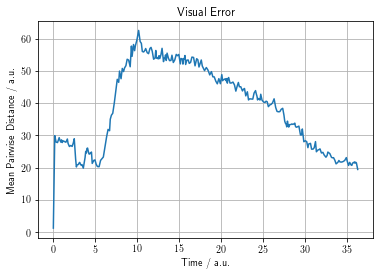

In [3]:
plt.plot(df_pd.time, df_pd.mean_pairwise_distance)
plt.title('Visual Error')
plt.xlabel('Time / a.u.')
plt.ylabel('Mean Pairwise Distance / a.u.')
plt.grid()
plt.show()
# plt.savefig('visual_error.pdf')

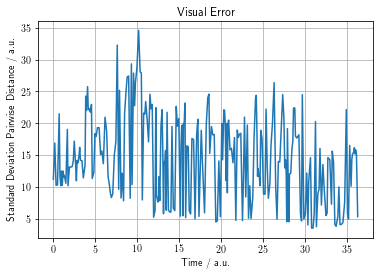

In [4]:
plt.plot(df_pd.time, df_pd.std_pairwise_distance)
plt.title('Visual Error')
plt.xlabel('Time / a.u.')
plt.ylabel('Standard Deviation Pairwise Distance / a.u.')
plt.grid()
plt.show()
# plt.savefig('visual_error.pdf')

In [5]:
df_fb = pd.read_csv('../data/h_gen_endoscopy_stored_views/exports/h_rcm_vs_feedback.csv')
df_fb.time = df_fb.time.apply(lambda x: x - df_fb.time.iloc[0])


# compute euclidean distance on trocar position error
df_fb['p_trocar_error_euclidean_distance'] = np.linalg.norm(
    np.array([df_fb['errors.p_trocar.position.x'], df_fb['errors.p_trocar.position.y'], df_fb['errors.p_trocar.position.z']])*1.e3, axis=0
)

df_fb

,time,states.task.values,states.p_trocar.position.x,states.p_trocar.position.y,states.p_trocar.position.z,errors.task.values,errors.p_trocar.position.x,errors.p_trocar.position.y,errors.p_trocar.position.z,p_trocar_error_euclidean_distance
0,0.000000,"(0.0, 0.0, 0.0, 0.0)",0.843183,-0.056399,0.198077,"(0.1, 0.0, 0.0, 0.0)",0.000037,-0.000434,-0.000434,0.614869
1,0.029909,"(0.0, 0.0, 0.0, 0.0)",0.843081,-0.056209,0.198276,"(0.1, 0.0, 0.0, 0.0)",0.000139,-0.000623,-0.000633,0.899363
2,0.059999,"(0.0, 0.0, 0.0, 0.0)",0.842990,-0.056231,0.198232,"(0.1, 0.0, 0.0, 0.0)",0.000229,-0.000602,-0.000589,0.872844
3,0.089936,"(0.0, 0.0, 0.0, 0.0)",0.842957,-0.056351,0.198164,"(0.1, 0.0, 0.0, 0.0)",0.000262,-0.000481,-0.000522,0.757019
4,0.124678,"(0.0, 0.0, 0.0, 0.0)",0.842970,-0.056539,0.198194,"(0.1, 0.0, 0.0, 0.0)",0.000250,-0.000293,-0.000552,0.672827
...,...,...,...,...,...,...,...,...,...,...
1642,79.010195,"(0.0, 0.0, 0.0, 0.0)",0.843208,-0.056668,0.197619,"(0.00010691856027529313, 0.0003086073538901938...",0.000011,-0.000165,0.000023,0.166696
1643,79.038677,"(0.0, 0.0, 0.0, 0.0)",0.843206,-0.056693,0.197630,"(0.00010691856027529313, 0.0003086073538901938...",0.000014,-0.000139,0.000012,0.140293
1644,79.068864,"(0.0, 0.0, 0.0, 0.0)",0.843202,-0.056715,0.197633,"(0.00010691856027529313, 0.0003086073538901938...",0.000017,-0.000117,0.000009,0.118592
1645,79.102696,"(0.0, 0.0, 0.0, 0.0)",0.843198,-0.056738,0.197631,"(0.00010691856027529313, 0.0003086073538901938...",0.000021,-0.000095,0.000011,0.097724


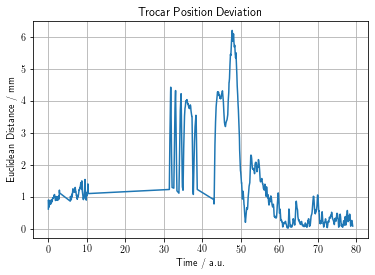

In [6]:
plt.plot(df_fb.time, df_fb.p_trocar_error_euclidean_distance)
plt.title('Trocar Position Deviation')
plt.xlabel('Time / a.u.')
plt.ylabel('Euclidean Distance / mm')
plt.grid()
plt.show()
# plt.savefig('trocar_position_deviation.pdf')

In [7]:
df_twist = pd.read_csv('../data/h_gen_endoscopy_stored_views/exports/twist.csv')
df_twist.time = df_twist.time.apply(lambda x: x - df_twist.time[0])
df_twist

,time,linear.x,linear.y,linear.z,angular.x,angular.y,angular.z
0,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000
1,2.812329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,5.692174,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000
3,8.676655,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,9.107104,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
296,78.747857,0.001572,-0.007326,-0.001353,0.001258,0.000792,0.001499
297,78.814703,0.001520,-0.007231,-0.004055,-0.006691,0.002629,0.001236
298,78.892277,0.001610,-0.007372,0.000107,0.004209,-0.001274,0.001814
299,78.986235,0.001617,-0.007405,0.000107,0.003086,-0.002204,0.001844


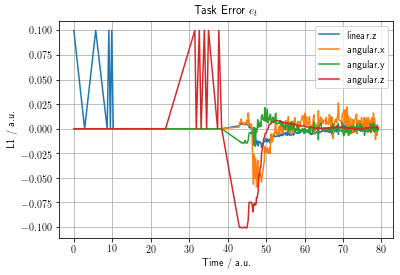

In [8]:
skip = [
    'time',
    'linear.x',
    'linear.y'
]

for key, col in df_twist.iteritems():
    if key in skip:
        continue
    plt.plot(df_twist.time, df_twist[key], label=key)

plt.title('Task Error $e_t$')
plt.xlabel('Time / a.u.')
plt.ylabel('L1 / a.u.')
plt.grid()
plt.legend()
plt.show()
# plt.savefig('task_error.pdf')

# Episodic Measurements

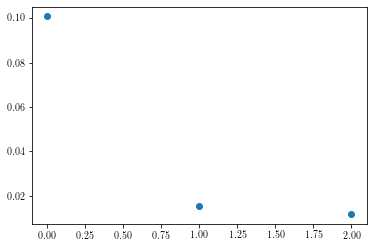

In [9]:
df_path = pd.read_csv('../data/h_gen_endoscopy_stored_views/exports/path_0.csv')
df_path.time = df_path.time.apply(lambda x: x - df_path.time[0])

# deviation target and final
df_path['target_rcm.task.values'] = df_path['target_rcm.task.values'].apply(lambda x: [float(xi) for xi in x.replace('(', '').replace(')', '').split(',')])
df_path['final_rcm.task.values'] = df_path['final_rcm.task.values'].apply(lambda x: [float(xi) for xi in x.replace('(', '').replace(')', '').split(',')])

# angle error
df_path['angle_error'] = np.linalg.norm(
    df_path['target_rcm.task.values'].apply(lambda x: np.array(x[1:])) - df_path['final_rcm.task.values'].apply(lambda x: np.array(x[1:]))
)

# depth error
df_path['depth_error'] = abs(
    df_path['target_rcm.task.values'].apply(lambda x: x[0]) - df_path['final_rcm.task.values'].apply(lambda x: x[0])
)

# plot
plt.scatter(df_path.id, df_path.angle_error)
plt.show()  # replace kinematics
